<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/TP4_mmora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matemáticas para Ciencias de los Datos:
# Trabajo práctico 4

- Professor: M.Sc.Saul Calderon.

- Students: 
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  

- June 15th, 2019   

# Importing dependencies

In [14]:
# Since Collab is being used, it is necessary to install Pytorch
!pip install torch
#!pip install autograd
# Libraries required for the exercises
import torch

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#For differentiation
import autograd.numpy as np
from autograd import grad

from torch.distributions import constraints
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property
import torch.distributions as distrib
from torchvision import datasets, transforms
from torch.distributions import normal
from torch.distributions import multivariate_normal


# 1.Optimización de funciones.  
Grafique las siguientes funciones:


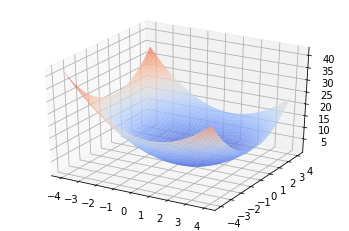

In [8]:
# Exercise 1.1.1

def function_1(x1,x2):
    return ((np.power(x1 - 0.7, 2))+(np.power(x2-0.5, 2))) 


def exercise_1_1():
  """
  Graph the surface of function 1.
  """
  x = np.linspace(-4, 4, 200)
  y = np.linspace(-4, 4, 200)

  X, Y = np.meshgrid(x, y)
  Z = function_1(X,Y)

  fig = plt.figure()
  ax  = fig.gca(projection='3d')
  ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)

  plt.show()


# Plot exercise 1_1
exercise_1_1()

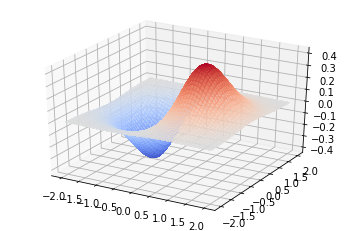

In [9]:
# Exercise 1.1.2
def function_2(x1,x2):
    return (x1 * np.exp(-(np.power(x1, 2))-(np.power(x2, 2)))) 

def exercise_1_2():
  """
  Graph the surface of function 2.
  """

  x = np.linspace(-2, 2, 300)
  y = np.linspace(-2, 2, 300)

  X, Y = np.meshgrid(x, y)
  Z = function_2(X,Y)

  fig = plt.figure()
  ax  = fig.gca(projection='3d')
  ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=False)

  plt.show()


# Plot exercise 1_1
exercise_1_2()


# 1.2. (50 puntos) Implemente el algoritmo del descenso del gradiente, para cada función: 
a) Escoja un coeficiente de aprendizaje α que permita la convergencia
y reporte los resultados para 10 corridas:

In [15]:
# Exercise 1.2
# Functions are defined in exercise 1

def gradientDescent(fx, initialX, initialY, alpha=0.01, N=1000, convTolerance = 1E-6):
  """
  Calculate the gradient descent of a function.
  Parameters: 
     fx: function for which gradient descent is calculated 
     initialX, initialY: el punto inicial.
     alpha: distance of movements
     N: maximum number of iterations
     convTolerance: max error. 
  """   
  
  #variables initialization
  x = np.zeros((N + 1, 2))      
  g = np.zeros((N + 1, 2))  
  t = 1 
  nfinal = N + 1 
  
  #Initial guess  
  x[0] = [initialX, initialY]
    
  #Compute full gradient (ie. f'x) of fx
  grad_fx = grad(fx, (0,1))

  #compute the gradient descent  
  while t < N + 1:
    print("t", t)
    
    #Evaluate grad_fx in x[t-1]
    gradiente= grad_fx(x[t - 1][0], x[t - 1][1])  
    print(gradiente)
    
    #Update x[t] based on x[t-1]
    x[t][0] = x[t - 1][0] - alpha * gradiente[0]
    x[t][1] = x[t - 1][1] - alpha * gradiente[1]
    
    #save the gradient 
    g[t] = gradiente
    
    if (np.sum(np.absolute(gradiente))) <= convTolerance:
       nfinal = t
       break
    t+=t 
  return (nfinal, x, g)

#Test gradient)Descent
nFinal, x, g = gradientDescent(function_1, 2,1)
print(nFinal)

#Test gradient)Descent
nFinal2, x2, g2 = gradientDescent(function_2, 2, 1, alpha=0.01)
print(nFinal2)



t 1
(array(2.6), array(1.))
t 2
(array(2.548), array(0.98))
t 4
(array(-1.4), array(-1.))
t 8
(array(-1.4), array(-1.))
t 16
(array(-1.4), array(-1.))
t 32
(array(-1.4), array(-1.))
t 64
(array(-1.4), array(-1.))
t 128
(array(-1.4), array(-1.))
t 256
(array(-1.4), array(-1.))
t 512
(array(-1.4), array(-1.))
1001
t 1
(array(-0.04716563), array(-0.02695179))
t 2
(array(-0.04707671), array(-0.02690007))
t 4
(array(1.), array(0.))
t 8
(array(1.), array(0.))
t 16
(array(1.), array(0.))
t 32
(array(1.), array(0.))
t 64
(array(1.), array(0.))
t 128
(array(1.), array(0.))
t 256
(array(1.), array(0.))
t 512
(array(1.), array(0.))
1001


# 1.3. Implemente el algoritmo de Newton-Raphson, para cada función:

In [16]:
# Exercise 1.3

def newtonRaphson(fx, initialX, initialY, alpha=0.01, N=1000, convTolerance = 1E-6):
  """
  Newton Raphson algoritm for a function.
  Parameters: 
     fx: function for which gradient descent is calculated 
     initialX, initialY: el punto inicial.
     alpha: distance of movements
     N: maximum number of iterations
     convTolerance: max error. 
  """  
  
  #variables initialization
  x = np.zeros((N + 1, 2))      
  g = np.zeros((N + 1, 2))  
  HM_1 = np.zeros((2, 2))  

  t = 1 
  nfinal = N + 1 
  
  #Initial guess  
  x[0] = [initialX, initialY]
    
  #First partial gradient
  grad_fx1 = grad(fx, 0)
  grad_fx2 = grad(fx, 1)
  
  #Compute full gradient (ie. f'x) of fx
  grad_fx = grad(fx, (0,1))
  
  #Compute the Hessian Matrix HM
  grad_x1_x1  = grad(grad_fx1, 0)   
  grad_x1_x2  = grad(grad_fx1, 1)    
  grad_x2_x1 = grad(grad_fx2, 0)   
  grad_x2_x2 = grad(grad_fx2, 1)   
    
  #compute the gradient descent  
  while t < N + 1:
    print("t", t)
    
    #Hessian Matrix HM raised to -1
    #[on_true] if [expression] else [on_false]
    HM_1[0][0] = (1/grad_x1_x1(x[t - 1][0], x[t - 1][1]) if (grad_x1_x1(x[t - 1][0], x[t - 1][1]))>0 else 0)   
    HM_1[0][1] = (1/grad_x1_x2(x[t - 1][0], x[t - 1][1]) if (grad_x1_x2(x[t - 1][0], x[t - 1][1]))>0 else 0)   
    HM_1[1][0] = (1/grad_x2_x1(x[t - 1][0], x[t - 1][1]) if (grad_x2_x1(x[t - 1][0], x[t - 1][1]))>0 else 0)
    HM_1[1][1] = (1/grad_x2_x2(x[t - 1][0], x[t - 1][1]) if (grad_x2_x2(x[t - 1][0], x[t - 1][1]))>0 else 0)
    
    gradiente= grad_fx(x[t - 1][0], x[t - 1][1])  
    print(gradiente)
    
    x[t] = x[t - 1] -(HM_1).dot(gradiente)   
    g[t] = gradiente
    
    if (np.sum(np.absolute(gradiente))) <= convTolerance:
       nfinal = t
       break
    t+=t 
  return (nfinal)

#Test Newton Raphson
nFinal = newtonRaphson(function_1, 2,1)
print(nFinal)

#Test Newton Raphson
nFinal2= newtonRaphson(function_2, 2,3)
print(nFinal2)


t 1
(array(2.6), array(1.))
t 2
(array(0.), array(0.))
2
t 1
(array(-1.58223058e-05), array(-2.71239529e-05))
t 2
(array(-1.73550711e-07), array(-2.3720397e-07))
2


/usr/local/lib/python3.6/dist-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


# 2. El algoritmo del Perceptrón con descenso del gradiente

Tamanio de la matriz de covarianza 1 torch.Size([2, 2])
Matriz de covarianza 1 tensor([[3., 0.],
        [0., 3.]])
Tamanio de la matriz de covarianza 2 torch.Size([2, 2])
Matriz de covarianza 2 tensor([[2., 0.],
        [0., 1.]])


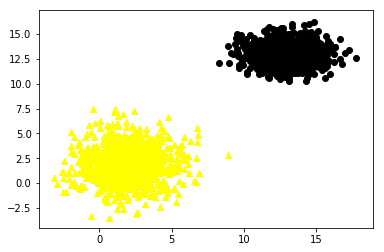

In [17]:
# Exercise 1.
"""
Creates the data to be used for training, using a GMM distribution
@param numberSamplesPerClass, the number of samples per class
@param mean1, means for samples from the class 1
@param mean2, means for samples from the class 2
@param stds1, standard deviation for samples, class 1
@param stds2, standard deviation for samples, class 2
"""
def createData(numberSamplesPerClass = 2, mean1 = [2, 2], mean2 = [6, 6], stds1 = [3, 3], stds2 = [2, 1]):
    means = torch.zeros(2)

    # Ones to concatenate for bias
    ones = torch.ones(numberSamplesPerClass, 1)
    means[0] = mean1[0]
    means[1] = mean1[1]

    # Covariance matrix creation with identity
    covarianceMatrix = torch.eye(2)
    covarianceMatrix[0, 0] = stds1[0]
    covarianceMatrix[1, 1] = stds1[1]
    
    print("Tamanio de la matriz de covarianza 1", covarianceMatrix.shape)
    print("Matriz de covarianza 1", covarianceMatrix)

    
    samplesClass1 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)

    means[0] = mean2[0]
    means[1] = mean2[1]
    covarianceMatrix[0, 0] = stds2[0]
    covarianceMatrix[1, 1] = stds2[1]
    samplesClass2 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)

    print("Tamanio de la matriz de covarianza 2", covarianceMatrix.shape)
    print("Matriz de covarianza 2", covarianceMatrix)    
    
    
    # Concatenates the ones for the bias
    samplesClass1Bias = torch.cat((ones, samplesClass1), 1)
    samplesClass2Bias = torch.cat((ones, samplesClass2), 1)
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    
    plt.scatter(samplesClass1[:, 0], samplesClass1[:, 1], marker='^', c='yellow')
    plt.scatter(samplesClass2[:, 0], samplesClass2[:, 1], marker='o', c='black')

    plt.show()
    #Create samples with bias
    samplesAllBias = torch.cat((samplesClass1Bias, samplesClass2Bias), 0)
    
    #Create targets
    targetsClass1 = torch.ones(numberSamplesPerClass, 1)
    targetsClass2 = -1 * torch.ones(numberSamplesPerClass, 1)
    targetsAll = torch.cat((targetsClass1, targetsClass2), 0)
    
    return (targetsAll, samplesAllBias)


'''
Creates data with gaussian distribution
'''
def createDataOneClass(means, covarianceMatrix, numberSamples):
    # Inits the bi gaussian data generator
    multiGaussGenerator = multivariate_normal.MultivariateNormal(means, covarianceMatrix)
    # Takes the samples
    samples = multiGaussGenerator.sample(torch.Size([numberSamples]))
    
    return samples


# Sample data A
(TargetsAll, SamplesAll) = createData(numberSamplesPerClass = 1000, mean2 = [13, 13])